In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('red-wine-quality-cortez-et-al-2009.csv')      #Reading CSV file
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.shape

(1599, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

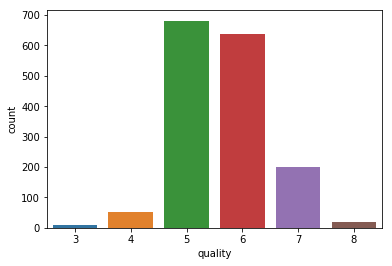

In [7]:
import seaborn as sb
sb.countplot(df['quality'],label="Count")   #or sb.countplot(x='quality',data=df)
plt.show()

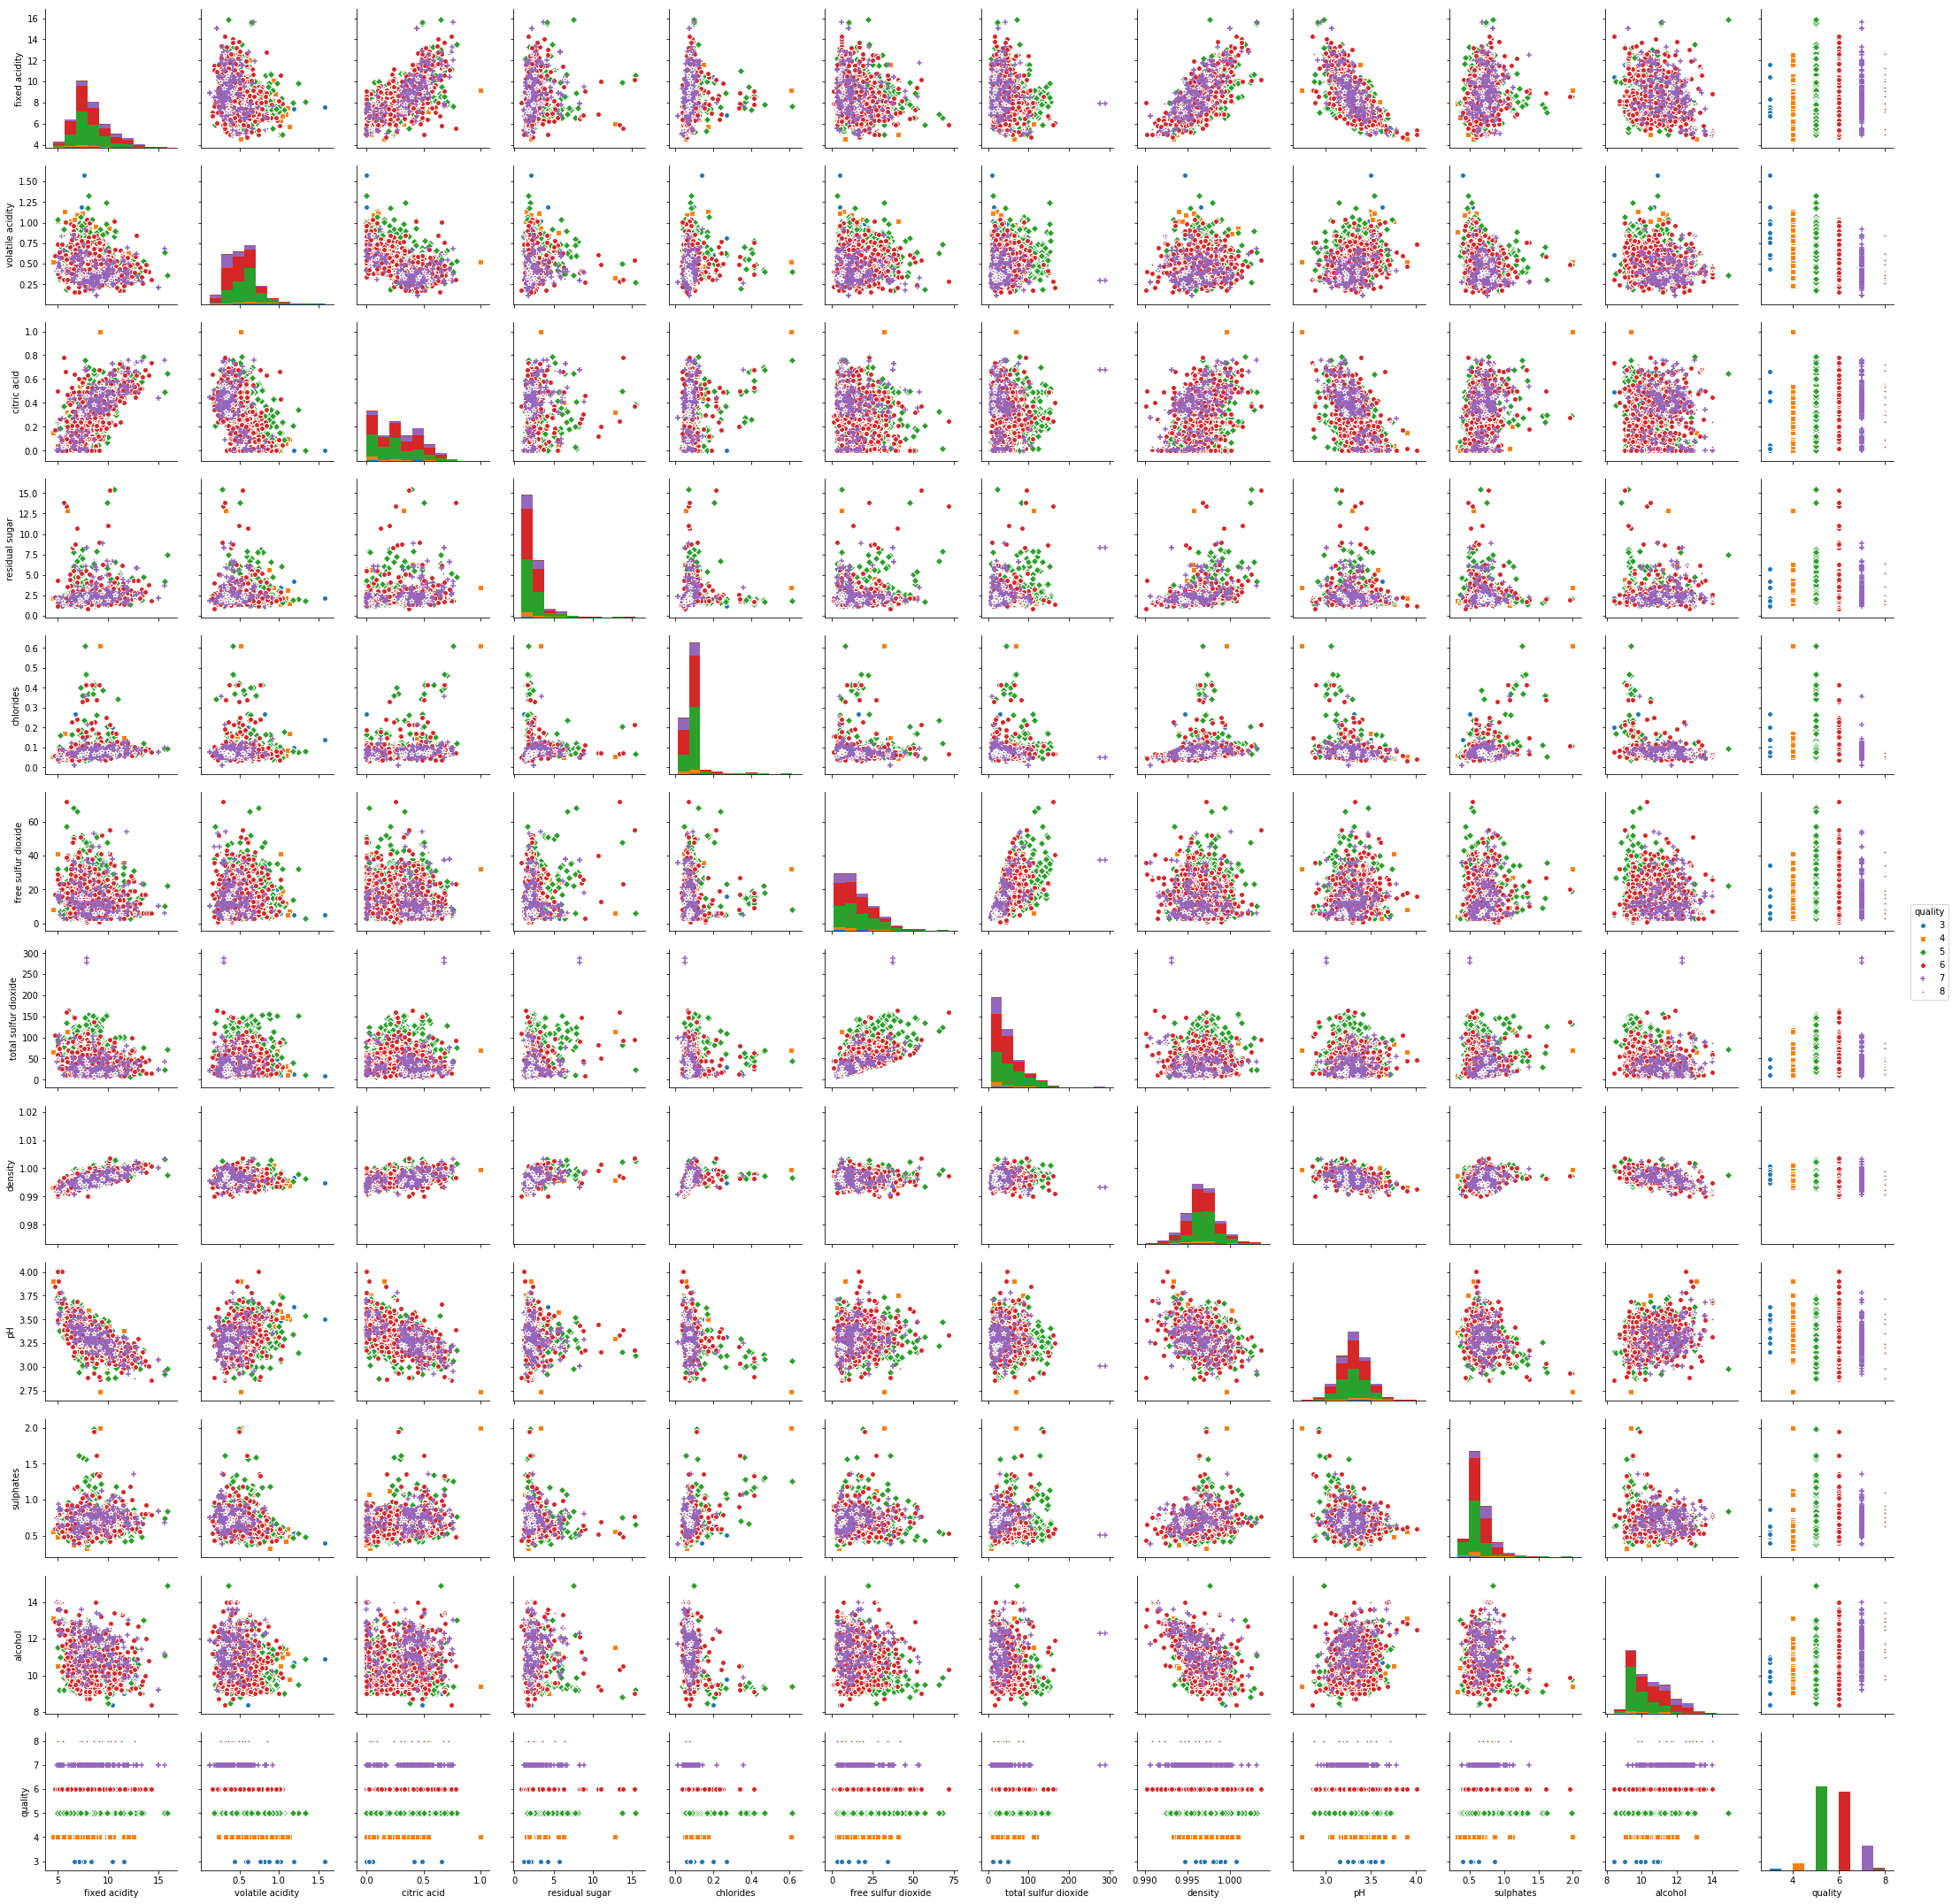

In [12]:
#pair-plot

import seaborn as sb

g = sb.pairplot(df, hue='quality',markers=["o", "s", "D","o","+","*"])
plt.show()

In [13]:
#Spliting the dataset into a training set and a testing set

x=df.drop('quality',axis=1)
y=df['quality']

from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
#K – Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

model_KNN=KNeighborsClassifier().fit(x_train,y_train)
print('Accuracy of K – Nearest Neighbour Classifier is {:.2f}' .format(model_KNN.score(x_test,y_test)))

Accuracy of K – Nearest Neighbour Classifier is 0.49


In [15]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model_lr=LogisticRegression().fit(x_train,y_train)
print("Accuracy of Logistic Regression is {:.2f}" .format(model_lr.score(x_test,y_test)))

Accuracy of Logistic Regression is 0.60


In [16]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

model_rf=RandomForestClassifier().fit(x_train,y_train)
print("Accuracy of Random Forest Classifier is {:.2f}" .format(model_rf.score(x_test,y_test)))

Accuracy of Random Forest Classifier is 0.66


In [17]:
#Support Vector Machine (SVM) Classifier

from sklearn.svm import SVC

model_svm=SVC().fit(x_train,y_train)
print("Accuracy of Support Vector Machine Classifier is {:.2f}" .format(model_svm.score(x_test,y_test)))

Accuracy of Support Vector Machine Classifier is 0.58


In [18]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier().fit(x_train,y_train)
print("Accuracy of Decision Tree Classifier is {:.2f}" .format(model_dt.score(x_test,y_test)))

Accuracy of Decision Tree Classifier is 0.61


In [19]:
#Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

model_gnb=GaussianNB().fit(x_train,y_train)
print("Accuracy of Gaussian Naive Bayes Classifier is {:.2f}" .format(model_gnb.score(x_test,y_test)))

Accuracy of Gaussian Naive Bayes Classifier is 0.53


In [20]:
#Gradient Boosting Regressor 

from sklearn.ensemble import GradientBoostingRegressor

model_gbr=GradientBoostingRegressor().fit(x_train,y_train)
print("Accuracy of Gradient Boosting Regressor is {:.2f}" .format(model_gbr.score(x_test,y_test)))

Accuracy of Gradient Boosting Regressor is 0.40


In [21]:
#AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

model_ab=AdaBoostClassifier().fit(x_train,y_train)
print("Accuracy of Gradient Boosting Regressor is {:.2f}" .format(model_ab.score(x_test,y_test)))

Accuracy of Gradient Boosting Regressor is 0.36


In [22]:
#Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_lda=LinearDiscriminantAnalysis().fit(x_train,y_train)
print('Accuracy of Linear Discriminant Analysis is {:.2f}' .format(model_lda.score(x_test,y_test)))

Accuracy of Linear Discriminant Analysis is 0.62


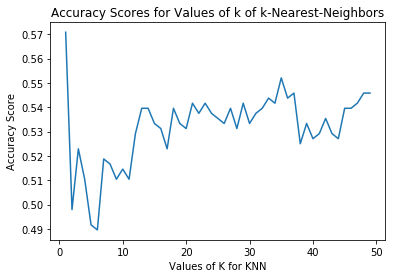

KNN gives Maximum Accuracy is 0.5708333333333333 and least value of K for maximum accuracy is 1


In [23]:
#K – Nearest Neighbour (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier

# experimenting with different k values on which KNN gives more accurate result
score=[]
k_range=range(1,50)
A_max=0
k_best=1

for k in k_range:
    model_knn=KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(x_train,y_train)
    accu_knn=model_knn.score(x_test,y_test)
    score.append(accu_knn)
    if(A_max<accu_knn):
        A_max=accu_knn
        k_best=k
        
plt.plot(k_range,score)
plt.xlabel('Values of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
 
print('KNN gives Maximum Accuracy is {0} and least value of K for maximum accuracy is {1}' .format(A_max,k_best))